<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [2]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [3]:
# Find the shape
df.shape

(14999, 10)

In [4]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

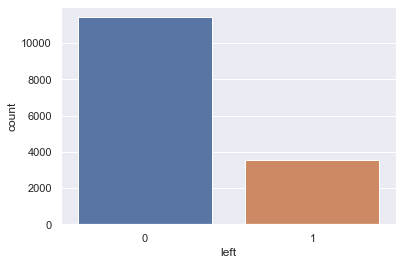

In [8]:
# Count of how many employees left the company
sns.countplot(x = 'left', data = df);

In [9]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

**Question:What can you interpret from the plot above?** 

Answer: Less than 4k employees have left the company

**Task 3: Find out the number of projects being handled.**

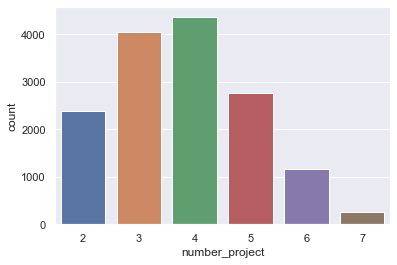

In [10]:
# Write code here
sns.countplot(data = df, x = 'number_project');

**Question: What insights can you infer from the above plot?**

Answer: 4 number of projects are the most handled by any employee which is more than 4k followed by 3 number of projects at a time, whereas 7 number of projects are the least handled.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [11]:
df.groupby(['number_project','left'])['left'].count()

number_project  left
2               0        821
                1       1567
3               0       3983
                1         72
4               0       3956
                1        409
5               0       2149
                1        612
6               0        519
                1        655
7               1        256
Name: left, dtype: int64

**Task 5:** Make a plot of your findings (only turn-over employees)

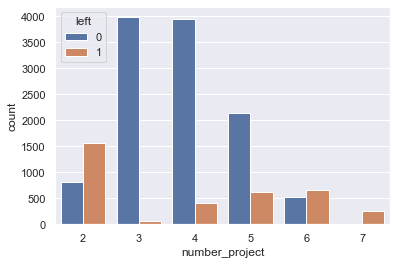

In [12]:
sns.countplot(x = 'number_project', hue = 'left', data = df);

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: Employee with projects number 3 and 4 are not leaving the company because they seemed satisfied compared to less or more number of project. Employees with 7 projects are all leaving

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

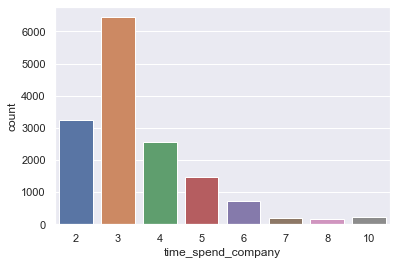

In [13]:
# Show the plot for the count of years here
sns.countplot(data = df, x ='time_spend_company');

**Question: What is the maximum number of time spend by the employees?**

Answer: 3 years is the most time spend by employees

In [14]:
# # Write the code here to get the percentage of employees leaving.
time_spend = df.groupby('time_spend_company')['left'].value_counts(normalize = True)

In [15]:
time_spend

time_spend_company  left
2                   0       0.983662
                    1       0.016338
3                   0       0.753841
                    1       0.246159
4                   0       0.651936
                    1       0.348064
5                   1       0.565513
                    0       0.434487
6                   0       0.708914
                    1       0.291086
7                   0       1.000000
8                   0       1.000000
10                  0       1.000000
Name: left, dtype: float64

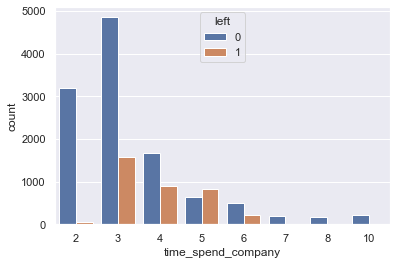

In [16]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.countplot(data = df, x = 'time_spend_company', hue = 'left');

**Question: After what time period are employees most likely to leave the company ?**

Answer: After 3 to 4 year employees are most likely to leave

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

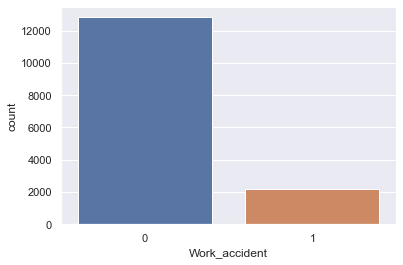

In [17]:
# Number of employees involved in work accident
sns.countplot(x = 'Work_accident', data = df);

**Question: What can you conclude from the graph above?**

Answer: As we can see Work Accident is not a major contributor in employee churn

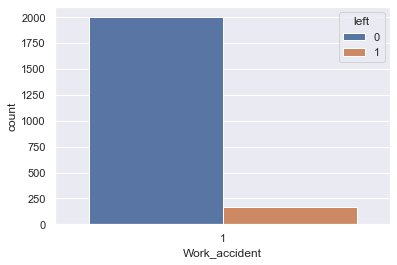

In [18]:
# Number of employees involved in work accident and left or not left
df1 = df.loc[df['Work_accident'] == 1]
sns.countplot(x="Work_accident", hue="left",data=df1);

## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

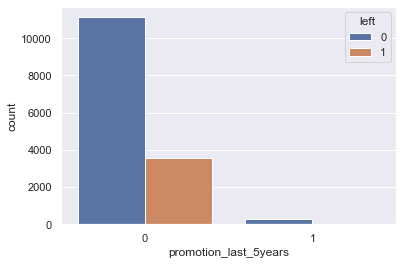

In [19]:
# Write code here
sns.countplot(x = 'promotion_last_5years', hue='left', data=df);

Answer: Employees are leaving after no promotion of 5 years

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

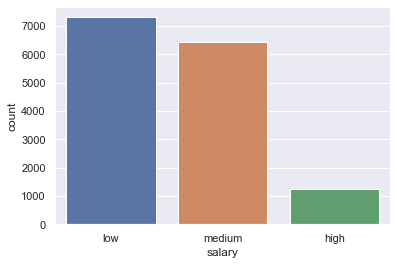

In [20]:
#Write code here
sns.countplot(data = df,x= 'salary');

iAnswer: Employee with low and medium salary are most in the company

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

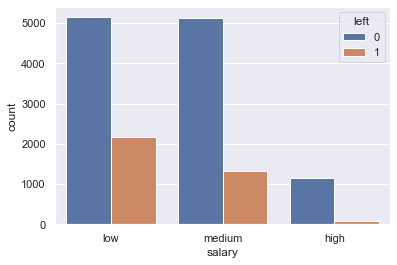

In [21]:
# Write code here
sns.countplot(data = df,x= 'salary', hue='left');

**Question: What does the above plot show?**

Answer: Employee with low and medium salary are likely to leave

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

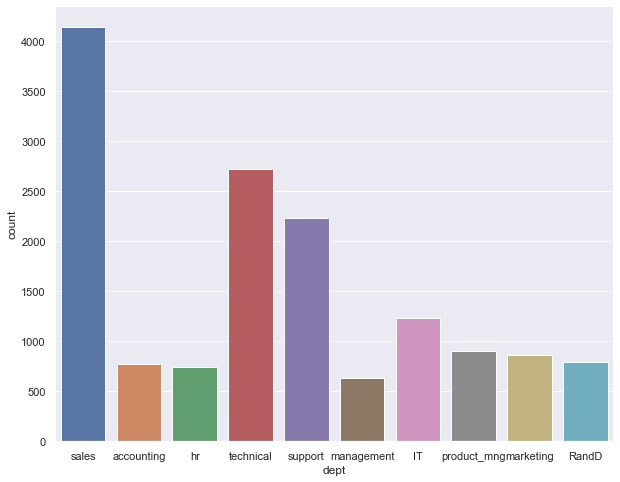

In [22]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
plt.figure(figsize=(10, 8))
sns.countplot(data = df , x = 'dept');

**Question: Which department has maximum number of employees?**

Answer: Sales Department has the highest No. of Employees

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [23]:
# Write code here

dept_turn = df.groupby('dept')['left'].value_counts(normalize = True)
dept_turn

dept         left
IT           0       0.777506
             1       0.222494
RandD        0       0.846252
             1       0.153748
accounting   0       0.734029
             1       0.265971
hr           0       0.709066
             1       0.290934
management   0       0.855556
             1       0.144444
marketing    0       0.763403
             1       0.236597
product_mng  0       0.780488
             1       0.219512
sales        0       0.755072
             1       0.244928
support      0       0.751009
             1       0.248991
technical    0       0.743750
             1       0.256250
Name: left, dtype: float64

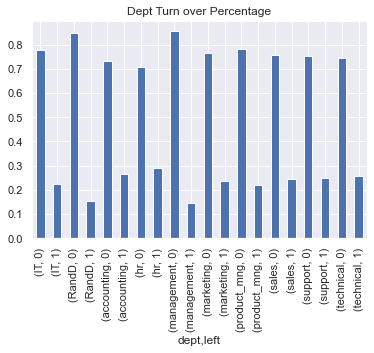

In [24]:
# Write code here to draw the plot
turn_over = dept_turn.plot(kind='bar', title = 'Dept Turn over Percentage')

Answer: Hr dept has highest churn rate

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

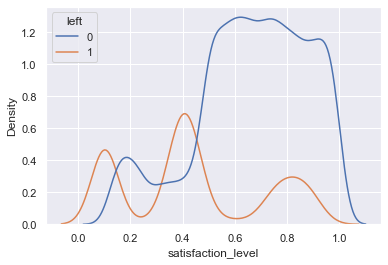

In [25]:
# Write the code here
sns.kdeplot(data = df, x = 'satisfaction_level' , hue= 'left');

**Question: What can you conclude from the plot above?**

Answer:Employee with less satisfaction level are leaving the company

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [26]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type']  = ''
df.loc[df['satisfaction_level']>=0.5, 'satisfaction_level_type'] = 'High'
df.loc[df['satisfaction_level']<0.5, 'satisfaction_level_type'] = 'Low'


**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

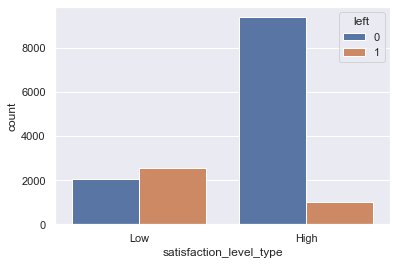

In [27]:
# Write Code Here
sns.countplot(data= df , x= 'satisfaction_level_type', hue = 'left');

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

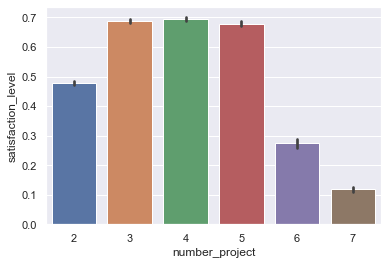

In [28]:
# Write Code Here
sns.barplot(x="number_project", y ="satisfaction_level", data=df);

**Make a Plot of your findings**

In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


**Question:** What did you infer drom the above plot

**Answer:**

Now lets check number of projects for low satisfaction level

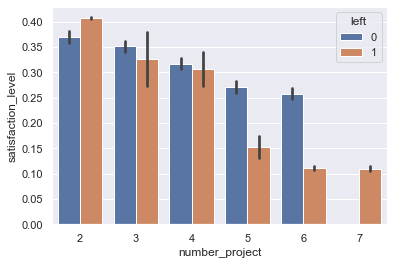

In [30]:
# Write Code Here
low_satisfaction_level = df.loc[df['satisfaction_level_type'] == 'Low']
sns.barplot(data = low_satisfaction_level, x = 'number_project', y = 'satisfaction_level', hue='left');

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [31]:
df['employee_type']=''
df.loc[df['number_project'] == 2, 'employee_type'] = 'unburdened'
df.loc[(df['number_project']>=3)  & (df['number_project']<=5), 'employee_type'] = 'Satisfactory'
df.loc[df['number_project']>=6, 'employee_type'] = 'Burdened'

**Task 15: Make a countplot to see which type of employee is leaving**

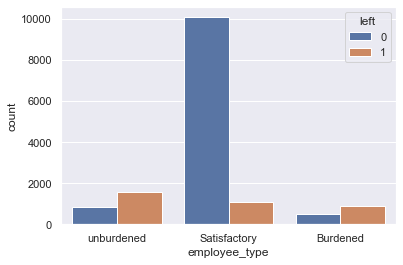

In [32]:
# Write code here
sns.countplot(data = df , x = 'employee_type' , hue='left' );

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [33]:
# Write code here
df.drop(['number_project','satisfaction_level'], axis=1,inplace=True)

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [34]:
# Write code here
df_OneHot = pd.get_dummies(df, columns = ['dept','salary','satisfaction_level_type','employee_type'])

In [35]:
df = df_OneHot.copy()

**Task 17: Creating Independant and Dependant Variables**

In [36]:
# Write code here
X = df.drop(['left'], axis = 1)
Y = df[['left']]

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Write code here
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.3, random_state=100, shuffle=True)

In [39]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499, 1)
(4500, 23) (4500, 1)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [40]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Making instance and training the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(xtrain,ytrain)

C:\Users\FARJAD\AppData\Local\Temp\ipykernel_19684\2434737510.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain,ytrain)


RandomForestClassifier()

In [42]:
# Get predictions
rf_pred=clf.predict(xtest)

**Precision**

In [43]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [44]:
#Write the code to calculate
pr_score = precision_score(ytest, rf_pred)
pr_score

0.9759926131117267

**Accuracy**

In [45]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [46]:
# Write the code to calculate
rf_acc= accuracy_score(ytest,rf_pred)
rf_acc

0.9848888888888889

**Recall**

In [47]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [48]:
# Write the code to calculate
rf_recall= recall_score(ytest,rf_pred)
rf_recall

0.9617834394904459

**F1-Score**

In [49]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [50]:
# Write the code to calculate
rf_f1_score=f1_score(ytest,rf_pred)
rf_f1_score

0.9688359303391384

**Classification Report**

In [51]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [52]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.98      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [53]:
# Import the model
from sklearn.linear_model import LogisticRegression 

In [54]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=100)
lr_model.fit(xtrain, ytrain);

C:\Users\FARJAD\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\FARJAD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# get the predictions
lr_pred=lr_model.predict(xtest)

**Accuracy**

In [56]:
#Write the code here
lr_accuracy= accuracy_score(ytest, lr_pred)
lr_accuracy

0.8602222222222222

**Precision**

In [57]:
#Write the code here
lr_precision=precision_score(ytest, lr_pred)
lr_precision

0.7290448343079922

**Recall**

In [58]:
#Write the code here
lr_recall=recall_score(ytest,lr_pred)
lr_recall

0.6806187443130118

**F1 Score**

In [59]:
#Write the code here
lr_f1_score = f1_score(ytest, lr_pred)
lr_f1_score

0.704

**Classification Report**

In [60]:
#Write the code here
from sklearn.metrics import classification_report
print(classification_report(ytest,lr_pred))


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3401
           1       0.73      0.68      0.70      1099

    accuracy                           0.86      4500
   macro avg       0.81      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [61]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [62]:
#Write the code here to make an instance and train the model with random state =100
Ada_boost = AdaBoostClassifier(n_estimators=50,random_state=100)
Ada_boost.fit(xtrain,ytrain);

C:\Users\FARJAD\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
# Get the predictions
pred_clf_adb= Ada_boost.predict(xtest)

**Accuracy**

In [64]:
#Write code here
ab_accuracy= accuracy_score(ytest, pred_clf_adb)
ab_accuracy

0.928

**Precision**

In [65]:
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
ab_precision

0.8611369990680335

**Recall**

In [66]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
ab_recall

0.8407643312101911

**F1-Score**

In [67]:
#Write code here
ab_f1_score=f1_score(ytest,pred_clf_adb)
ab_f1_score

0.850828729281768

**Classification Report**

In [68]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.86      0.84      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [69]:
#Write the code here to import the model
import xgboost as xgb

In [70]:
#Write the code here to make an instance and train the model with random state =100
model = xgb.XGBClassifier()
model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [71]:
# Get the predictions
pred_clf_xgb =  model.predict(xtest)

**Accuracy**

In [72]:
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)

**Precision**

In [73]:
#Write code here
xgb_precision= precision_score(ytest,pred_clf_xgb)

**Recall**

In [74]:
#Write code here
xgb_recall= recall_score(ytest,pred_clf_xgb)

**F1-Score**

In [75]:
#Write code here
xgb_f1_score= f1_score(ytest,pred_clf_xgb)

**Classification Report**

In [76]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.86      0.84      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a dataframe that shows the models and scores for each models.**

In [77]:
# Write the code here

comparison_dict = {"Algorithm": ["Random Forest",'Logistic Regression', "Ada Boost",'XG Boost'],
                   "Accuracy": [rf_acc, lr_precision, ab_accuracy, xgb_accuracy],
                   "Recall": [rf_recall, rf_recall, ab_recall, xgb_recall],
                   "Precision": [pr_score, lr_precision, ab_precision, xgb_precision],
                   "F1 Score": [rf_f1_score, lr_f1_score, ab_f1_score, xgb_f1_score]
                   }


In [78]:
comparison = pd.DataFrame(comparison_dict)

In [79]:
comparison

,Algorithm,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.984889,0.961783,0.975993,0.968836
1,Logistic Regression,0.729045,0.961783,0.729045,0.704000
2,Ada Boost,0.928000,0.840764,0.861137,0.850829
3,XG Boost,0.979556,0.954504,0.961503,0.957991


comparison

**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

Random Forest has the best score, followed by XGBoost